In [1]:
# importing packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# reading in CSV
df = pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176518,122804.0,1.867633,0.067490,-2.083760,2.949168,2.798819,4.513581,-0.459531,1.013802,-0.603922,...,0.064481,0.346401,0.037249,0.720629,0.339727,0.209881,-0.010506,-0.061317,19.32,0
283094,171370.0,-10.243984,8.517532,-6.591644,-2.460064,-3.135762,-1.112216,-2.164932,3.746472,4.803544,...,-0.996068,-1.425127,0.660345,-1.235856,1.492283,0.295328,2.177236,1.240884,10.76,0
45955,42579.0,-3.529237,-1.085031,0.599323,-1.531427,-1.084952,-0.020062,1.592441,-0.500454,-0.928957,...,-0.538717,0.445493,0.360510,0.307602,0.745300,-0.319171,0.674855,0.267995,372.62,0
1582,1233.0,-0.956865,1.483801,1.601873,0.884115,-0.094897,-0.015144,0.305496,0.443680,-0.567253,...,-0.238321,-0.462552,-0.268929,-0.094198,0.524294,-0.364814,0.227555,0.078699,1.49,0
216856,140662.0,-0.348561,0.813080,0.801079,-0.417471,0.132750,0.186855,0.167475,0.046369,0.260304,...,0.088899,0.104370,0.302994,0.753871,-1.752069,-0.259744,-0.274304,0.266956,4.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'No Fraud (0) vs. Fraud (1)')

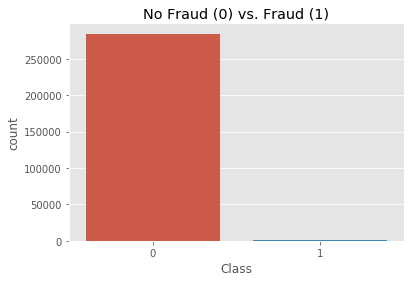

In [4]:
# taking a closer look at the class variable
sns.countplot('Class', data = df)
plt.title('No Fraud (0) vs. Fraud (1)')

In [5]:
x = df.drop(['Class'], axis=1)
y = df['Class']

In [6]:
y.sum()

# Only 492 positives

492

In [7]:
# imports 
from imblearn.over_sampling import RandomOverSampler

# random oversampling
ros = RandomOverSampler(random_state=42)
X_01, y_01 = ros.fit_resample(x, y)

# using Counter to display results of naive oversampling
from collections import Counter
print(sorted(Counter(y_01).items()))

[(0, 284315), (1, 284315)]


In [8]:
y_01[0:50,]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
y_01.sum()

# There are indeed 284315 values after resampling

284315

In [10]:
y_01

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [11]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

class modelpipeline:
    def __init__(self):
        pass
    
    def run_model(self, df, testratio, standardize, sampletype, modelname, text, CV):
        df = df.drop('Time', axis=1)
        if standardize == True:
            df = self.standardize(df)
        if sampletype == 'smote':
            X_train, X_test, y_train, y_test = sampling.smote_oversample(df, testratio)
        elif sampletype == 'adasyn':
            X_train, X_test, y_train, y_test = sampling.adasyn_oversample(df, testratio)
        else:
            X_train, X_test, y_train, y_test = sampling.naive_oversample(df, testratio)
        store = self.build_model(X_train, X_test, y_train, y_test, text, modelname, CV)
        # test model with all actual fraud results
        store['actual_accuracy'] = evaluate.actual_acc(df, store['model'])
        return store
    
    def build_model(self, X_train, X_test, y_train, y_test, text, modelname, CV):
        if modelname == 'LogisticRegression':
            if CV == True:
                param_grid = dict(C=[0.8,1,1.2], max_iter=[300], solver=['liblinear'])
                LogRegression = LogisticRegression()
                model = GridSearchCV(LogRegression, param_grid, cv=5, scoring='f1', verbose=10)
                model.fit(X_train,y_train)
                print("Best f1 score: " + str(model.best_score_))
                print("Best parameters: " + str(model.best_params_))
            else:
                model = LogisticRegression(max_iter=300, C=0.8, solver='liblinear')
                model.fit(X_train,y_train)
        elif modelname == 'XGBoost':
            if CV == True:
                end_value = math.ceil(math.sqrt(X_train.shape[1]))
                start_value = end_value - 2       
                # treedepth = list(range(start_value, end_value+1, 2))
                param_grid = dict(n_estimators=[100], max_depth=[end_value])
                GradientBoost = GradientBoostingClassifier()
                model = GridSearchCV(GradientBoost, param_grid, cv=5, scoring='f1', verbose=10)
                model.fit(X_train,y_train)
                print("Best f1 score: " + str(model.best_score_))
                print("Best parameters: " + str(model.best_params_))
                
                # Testing out xgb.cv (incomplete)
                # model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=start_value, n_estimators=100, random_state=42)
                # xgb_param = dict(n_estimators=100, max_depth=end_value)
                # xgtrain = xgb.DMatrix(X_train, label=y_train)
                # model = xgb.cv(params=xgb_param, dtrain=xgtrain, nfold=5, metrics='auc')
                # model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
                
                # USING kfold library to do kfold testing on XGBoost:
                # cross_val_score using kfold does not fit the model, so nothing can be predicted
                # it's just to see the results but the model has to be fitted later on
                # kfold = KFold(n_splits=3, random_state=42)
                # print(kfold)
                # scores = cross_val_score(model, X_train, y_train, cv=kfold)
                # print("CV Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))
            else:
                model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1])),
                                          n_estimators=100, random_state=42)
                model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'RandomForest':
            if CV == True:
                start_value = math.ceil(math.sqrt(X_train.shape[1]))
                end_value = start_value + 11         
                treedepth = list(range(start_value, end_value, 5))
                param_grid = dict(random_state=[42], max_depth=treedepth, n_estimators=[100,150])
                RFC = RandomForestClassifier()
                model = GridSearchCV(RFC, param_grid, cv=5, scoring='f1', verbose=10)
                model.fit(X_train,y_train)
                print("Best f1 score: " + str(model.best_score_))
                print("Best parameters: " + str(model.best_params_))
            else:
                treedepth = math.ceil(math.sqrt(X_train.shape[1]))
                model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=150)
                model.fit(X_train,y_train)
        else:
            # Parameters based on gridsearchcv of modelname = logistic regresion
            # Leave parameter blank for modelname to run this instance of logistic regression
            model = LogisticRegression(C=0.8, max_iter=300, solver='liblinear')
            model.fit(X_train,y_train)
        
        y_predict = model.predict(X_test)
        results = evaluate.model_results(y_test, y_predict, text)
        store = {"model": model, "X_train": X_train, "X_test": X_test, "y_train": y_train, 
                 "y_test": y_test, "results": results}
        print("Model fitting and results are complete!")
        return store
    
    def standardize(self, df):
        # Variables already standardized except for Amount
        # columns = df.columns.values.tolist()
        # columns.remove('Class')
        for column in ['Amount']:
            df[column] = (df[column] - df[column].mean()) / df[column].std()
        return df

class sampling:
    def __init__(self):
        pass
    @staticmethod
    def naive_oversample(df, testratio):
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testratio, random_state=42)
        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def smote_oversample(df, testratio):
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testratio, random_state=42)
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for SMOTE:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def adasyn_oversample(df, testratio):
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testratio, random_state=42)
        X_train, y_train = ADASYN().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for ADASYN:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test



class evaluate:
    def __init__(self):
        pass
    
    @staticmethod
    def model_results(y_test, y_predict, text):
        cm = metrics.confusion_matrix(y_test, y_predict)
        print(cm)
        RFC_CM = pd.DataFrame(cm, ['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
        sns.heatmap(RFC_CM, annot=True, annot_kws={"size": 16}, cmap='Greens', linewidths=1, fmt='g')# font size
        sns.set(font_scale=1.4)#for label size
        plt.title("Confusion Matrix for " + text)

        # fix for mpl bug that cuts off top/bottom of seaborn viz
        b, t = plt.ylim() 
        b += 0.5 
        t -= 0.5 
        plt.ylim(b, t) 
        plt.show() 

        accuracy = metrics.accuracy_score(y_test, y_predict)
        print('Accuracy: ' + str(accuracy))
        sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])
        recall = sensitivity
        print('Sensitivity: ' + str(sensitivity))
        specificity = cm[0][0] / (cm[0][0] + cm[0][1])
        print('Specificity: ' + str(specificity))
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
        print('Precision: ' + str(precision))
        f1 = 2 * (recall * precision)/(recall + precision)
        print('f1 score: ' + str(f1))
        auc = evaluate.ROC(y_test, y_predict, text)
        results = {"accuracy": accuracy, "sensitivity": sensitivity, "specificity": specificity, 
                   "precision": precision, "f1": f1, "auc": auc}
        print("Model classification metrics have finished calculating!")
        return results
    
    @staticmethod
    def ROC(y_test, y_predict, text):
        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        auc = metrics.roc_auc_score(y_test, y_predict)
        print("AUC value is: " + str(auc))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for ' + text)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        return auc

    @staticmethod
    def actual_acc(df, model):
        allpositive = df[df['Class'] == 1].copy()
        x_positive = allpositive.drop(['Class'], axis=1)
        y_positive = allpositive['Class']
        y_pospredict = model.predict(x_positive)
        accuracy_positive = metrics.accuracy_score(y_positive, y_pospredict)
        print("Accuracy with all fraud results is " + str(accuracy_positive * 100) + "%")
        return accuracy_positive

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
modelpipeline = modelpipeline()

Oversampling is complete!
[[55487  1377]
 [    8    90]]


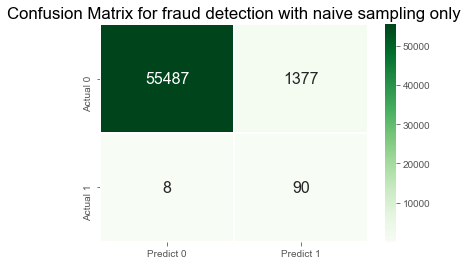

Accuracy: 0.975685544749131
Sensitivity: 0.9183673469387755
Specificity: 0.9757843275182893
Precision: 0.06134969325153374
f1 score: 0.11501597444089458
AUC value is: 0.9470758372285324
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 91.869918699187%


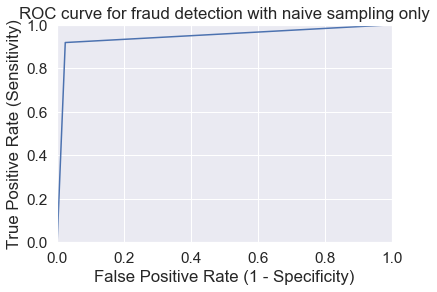

In [19]:
results = modelpipeline.run_model(df, 0.2, False, 'naive', None, 'fraud detection with naive sampling only', False)

In [20]:
results

{'model': LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=300,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'X_train': array([[ 1.95504092e+00, -3.80782711e-01, -3.15012853e-01, ...,
          4.51682478e-02, -4.71447917e-02,  9.99000000e+00],
        [-4.00975239e-01, -6.26942769e-01,  1.55533881e+00, ...,
         -3.70468822e-01, -1.44791686e-01,  4.59000000e+01],
        [ 7.25090164e-02,  8.20565650e-01, -5.61350916e-01, ...,
          2.06394866e-01,  7.02877702e-02,  1.19900000e+01],
        ...,
        [-6.39191253e-01, -8.55947886e-02,  1.26545196e+00, ...,
         -6.19624216e-02, -6.26865318e-02,  2.90180000e+02],
        [-7.96525366e-02,  3.22201046e+00, -3.72420139e+00, ...,
          6.68496566e-01,  5.95609829e-01,  1.00000000e+00],
 

In [24]:
type(results['X_test'])

numpy.ndarray

Oversampling is complete!
[[55487  1377]
 [    8    90]]


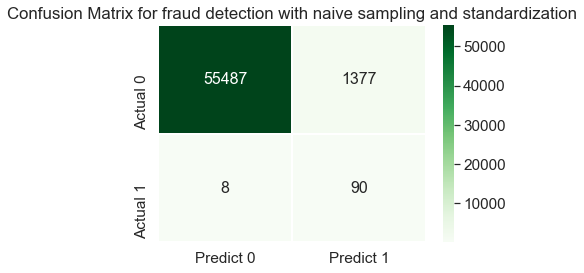

Accuracy: 0.975685544749131
Sensitivity: 0.9183673469387755
Specificity: 0.9757843275182893
Precision: 0.06134969325153374
f1 score: 0.11501597444089458
AUC value is: 0.9470758372285324
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 91.869918699187%
Number of Xs and Ys for SMOTE:
[(0, 227451), (1, 227451)]
Oversampling is complete!
[[55408  1456]
 [    8    90]]


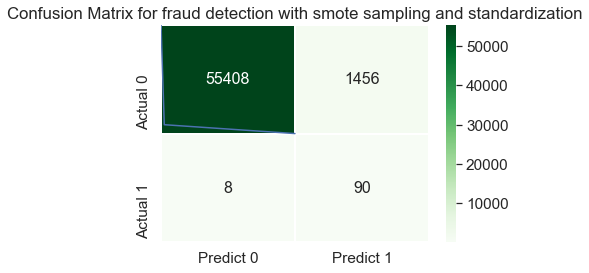

Accuracy: 0.9742986552438467
Sensitivity: 0.9183673469387755
Specificity: 0.9743950478334271
Precision: 0.05821474773609314
f1 score: 0.1094890510948905
AUC value is: 0.9463811973861013
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 91.869918699187%
Number of Xs and Ys for ADASYN:
[(0, 227451), (1, 227459)]
Oversampling is complete!
[[51674  5190]
 [    5    93]]


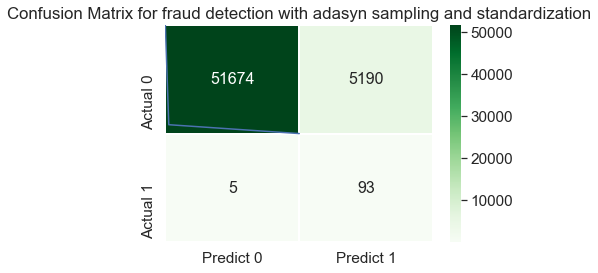

Accuracy: 0.9087988483550438
Sensitivity: 0.9489795918367347
Specificity: 0.9087296004501969
Precision: 0.017603634298693924
f1 score: 0.034566065787028435
AUC value is: 0.9288545961434659
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 95.9349593495935%


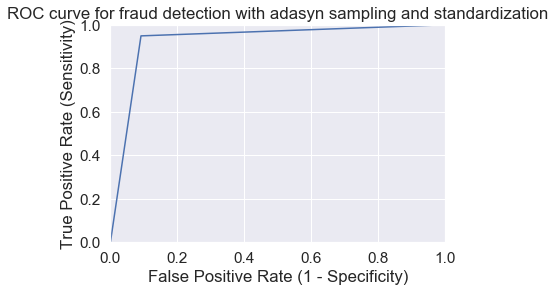

In [25]:
for samplingtypes in ['naive','smote','adasyn']:
    results = modelpipeline.run_model(df, 0.2, True, samplingtypes, 'LogisticRegression', 'fraud detection with ' + samplingtypes + ' sampling and standardization', False)

Oversampling is complete!
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=0.8, max_iter=300, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.8, max_iter=300, solver=liblinear, score=0.946, total=   8.9s
[CV] C=0.8, max_iter=300, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV]  C=0.8, max_iter=300, solver=liblinear, score=0.945, total=   9.9s
[CV] C=0.8, max_iter=300, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.8s remaining:    0.0s


[CV]  C=0.8, max_iter=300, solver=liblinear, score=0.944, total=  10.5s
[CV] C=0.8, max_iter=300, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.3s remaining:    0.0s


[CV]  C=0.8, max_iter=300, solver=liblinear, score=0.943, total=   9.2s
[CV] C=0.8, max_iter=300, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   38.5s remaining:    0.0s


[CV]  C=0.8, max_iter=300, solver=liblinear, score=0.947, total=   9.8s
[CV] C=1, max_iter=300, solver=liblinear .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   48.4s remaining:    0.0s


[CV] . C=1, max_iter=300, solver=liblinear, score=0.946, total=   9.0s
[CV] C=1, max_iter=300, solver=liblinear .............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.3s remaining:    0.0s


[CV] . C=1, max_iter=300, solver=liblinear, score=0.945, total=  10.5s
[CV] C=1, max_iter=300, solver=liblinear .............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV] . C=1, max_iter=300, solver=liblinear, score=0.944, total=  10.1s
[CV] C=1, max_iter=300, solver=liblinear .............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV] . C=1, max_iter=300, solver=liblinear, score=0.943, total=   9.7s
[CV] C=1, max_iter=300, solver=liblinear .............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.5min remaining:    0.0s


[CV] . C=1, max_iter=300, solver=liblinear, score=0.947, total=  10.0s
[CV] C=1.2, max_iter=300, solver=liblinear ...........................
[CV]  C=1.2, max_iter=300, solver=liblinear, score=0.946, total=   9.0s
[CV] C=1.2, max_iter=300, solver=liblinear ...........................
[CV]  C=1.2, max_iter=300, solver=liblinear, score=0.945, total=  10.2s
[CV] C=1.2, max_iter=300, solver=liblinear ...........................
[CV]  C=1.2, max_iter=300, solver=liblinear, score=0.944, total=  10.0s
[CV] C=1.2, max_iter=300, solver=liblinear ...........................
[CV]  C=1.2, max_iter=300, solver=liblinear, score=0.943, total=   9.4s
[CV] C=1.2, max_iter=300, solver=liblinear ...........................
[CV]  C=1.2, max_iter=300, solver=liblinear, score=0.947, total=   9.6s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.4min finished


Best f1 score: 0.9451771361511645
Best parameters: {'C': 1, 'max_iter': 300, 'solver': 'liblinear'}
[[55487  1377]
 [    8    90]]


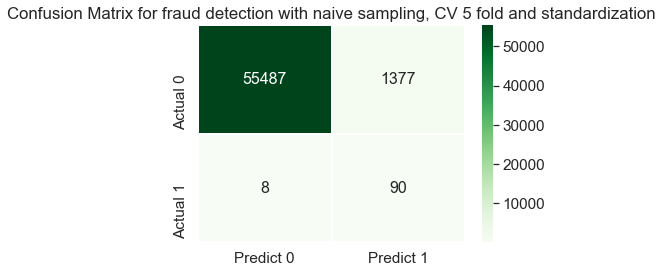

Accuracy: 0.975685544749131
Sensitivity: 0.9183673469387755
Specificity: 0.9757843275182893
Precision: 0.06134969325153374
f1 score: 0.11501597444089458
AUC value is: 0.9470758372285324
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 91.869918699187%


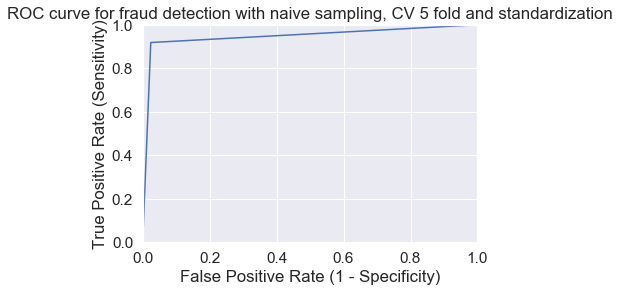

In [34]:
results = modelpipeline.run_model(df, 0.2, True, "naive", 'LogisticRegression', 'fraud detection with naive sampling, CV 5 fold and standardization', True)

In [36]:
print(results['model'])
print(results['model'].best_score_)
print(results['model'].best_params_)
print(results['model'].best_estimator_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.8, 1, 1.2], 'max_iter': [300],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=10)
0.9451771361511645
{'C': 1, 'max_iter': 300, 'solver': 'liblinear'}
LogisticRegression(C=1, class_weight=None, du

Oversampling is complete!
[[56752   112]
 [   11    87]]


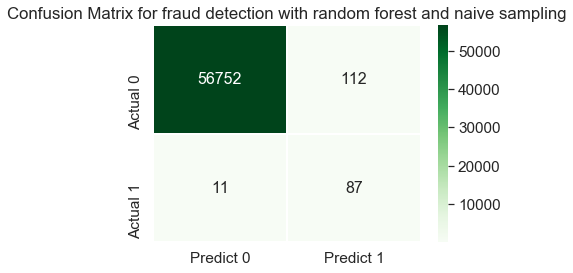

Accuracy: 0.9978406657069625
Sensitivity: 0.8877551020408163
Specificity: 0.998030388294879
Precision: 0.4371859296482412
f1 score: 0.5858585858585859
AUC value is: 0.9428927451678476
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 93.29268292682927%
Number of Xs and Ys for SMOTE:
[(0, 227451), (1, 227451)]
Oversampling is complete!
[[56668   196]
 [   11    87]]


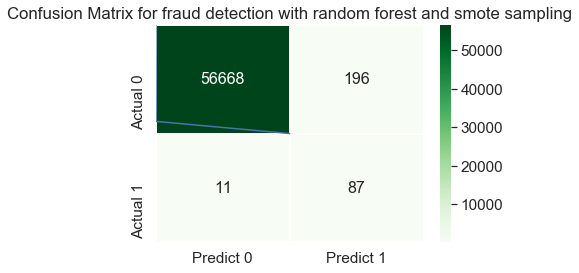

Accuracy: 0.9963659983848882
Sensitivity: 0.8877551020408163
Specificity: 0.9965531795160383
Precision: 0.30742049469964666
f1 score: 0.4566929133858268
AUC value is: 0.9421541407784273
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 92.07317073170732%
Number of Xs and Ys for ADASYN:
[(0, 227451), (1, 227459)]
Oversampling is complete!
[[54959  1905]
 [    8    90]]


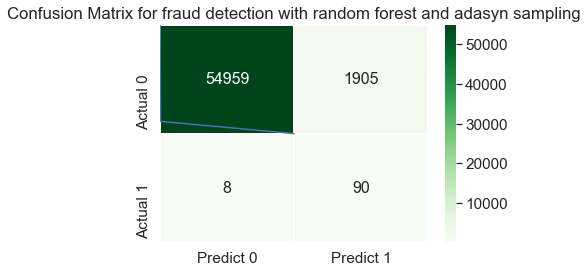

Accuracy: 0.9664162072960921
Sensitivity: 0.9183673469387755
Specificity: 0.9664990151941475
Precision: 0.045112781954887216
f1 score: 0.08600095556617296
AUC value is: 0.9424331810664615
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 96.7479674796748%


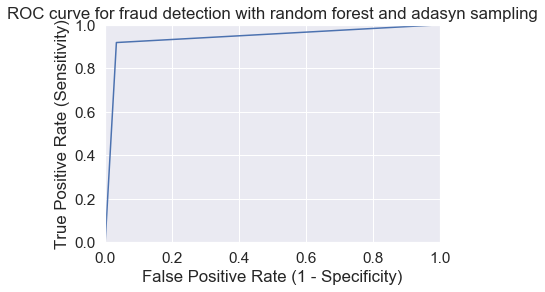

In [37]:
# Test out different sampling and get best AUC before doing CV

for samplingtypes in ['naive','smote','adasyn']:
    text = 'fraud detection with random forest and ' + str(samplingtypes) + ' sampling'
    results = modelpipeline.run_model(df, 0.2, True, samplingtypes, 'RandomForest', text, False)

Oversampling is complete!
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] max_depth=6, n_estimators=150, random_state=42 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, n_estimators=150, random_state=42, score=0.968, total= 3.4min
[CV] max_depth=6, n_estimators=150, random_state=42 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


[CV]  max_depth=6, n_estimators=150, random_state=42, score=0.971, total= 4.6min
[CV] max_depth=6, n_estimators=150, random_state=42 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.0min remaining:    0.0s


[CV]  max_depth=6, n_estimators=150, random_state=42, score=0.971, total= 9.7min
[CV] max_depth=6, n_estimators=150, random_state=42 ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 17.7min remaining:    0.0s


[CV]  max_depth=6, n_estimators=150, random_state=42, score=0.968, total= 9.1min
[CV] max_depth=6, n_estimators=150, random_state=42 ..................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 26.8min remaining:    0.0s


[CV]  max_depth=6, n_estimators=150, random_state=42, score=0.969, total= 8.8min
[CV] max_depth=11, n_estimators=150, random_state=42 .................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 35.6min remaining:    0.0s


[CV]  max_depth=11, n_estimators=150, random_state=42, score=0.998, total=15.7min
[CV] max_depth=11, n_estimators=150, random_state=42 .................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 51.3min remaining:    0.0s


[CV]  max_depth=11, n_estimators=150, random_state=42, score=0.998, total=14.7min
[CV] max_depth=11, n_estimators=150, random_state=42 .................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 66.1min remaining:    0.0s


[CV]  max_depth=11, n_estimators=150, random_state=42, score=0.999, total=13.8min
[CV] max_depth=11, n_estimators=150, random_state=42 .................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 79.9min remaining:    0.0s


[CV]  max_depth=11, n_estimators=150, random_state=42, score=0.999, total=13.3min
[CV] max_depth=11, n_estimators=150, random_state=42 .................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 93.2min remaining:    0.0s


[CV]  max_depth=11, n_estimators=150, random_state=42, score=0.998, total=13.4min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 106.7min finished


Best f1 score: 0.9984507724359305
Best parameters: {'max_depth': 11, 'n_estimators': 150, 'random_state': 42}
[[56842    22]
 [   16    82]]


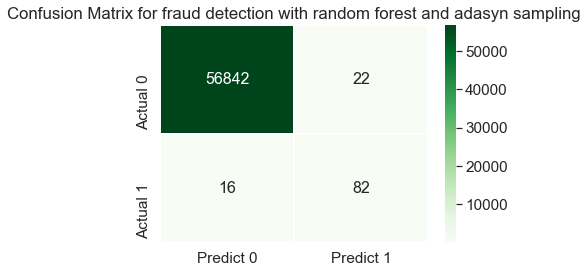

Accuracy: 0.9993328885923949
Sensitivity: 0.8367346938775511
Specificity: 0.999613111986494
Precision: 0.7884615384615384
f1 score: 0.8118811881188118
AUC value is: 0.9181739029320225
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 96.54471544715447%


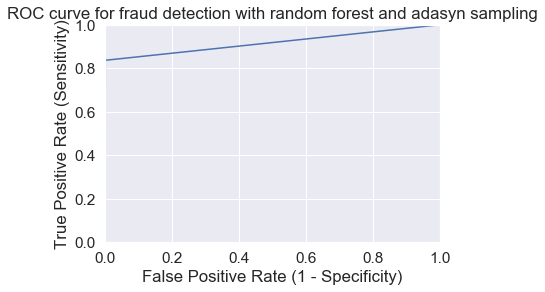

In [38]:
# Do CV on naive sampling model as that is best model based on AUC
text = 'Fraud detection with CV random forest and naive sampling'
results = modelpipeline.run_model(df, 0.2, True, 'naive', 'RandomForest', text, True)

In [40]:
print(results['model'])
print(results['model'].best_score_)
print(results['model'].best_params_)
print(results['model'].best_estimator_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

Oversampling is complete!
[0]	validation_0-error:0.024755	validation_1-error:0.017169
[5]	validation_0-error:0.015894	validation_1-error:0.007145
[10]	validation_0-error:0.00619	validation_1-error:0.005302
[15]	validation_0-error:0.004482	validation_1-error:0.004336
[20]	validation_0-error:0.002957	validation_1-error:0.003687
[25]	validation_0-error:0.001473	validation_1-error:0.003125
[30]	validation_0-error:0.00122	validation_1-error:0.002879
[35]	validation_0-error:0.000925	validation_1-error:0.00223
[40]	validation_0-error:0.000774	validation_1-error:0.001843
[45]	validation_0-error:0.00064	validation_1-error:0.00151
[50]	validation_0-error:0.000541	validation_1-error:0.001387
[55]	validation_0-error:0.000464	validation_1-error:0.001159
[60]	validation_0-error:0.000409	validation_1-error:0.001053
[65]	validation_0-error:0.000376	validation_1-error:0.000913
[70]	validation_0-error:0.000303	validation_1-error:0.000755
[75]	validation_0-error:0.000262	validation_1-error:0.000685
[80]	

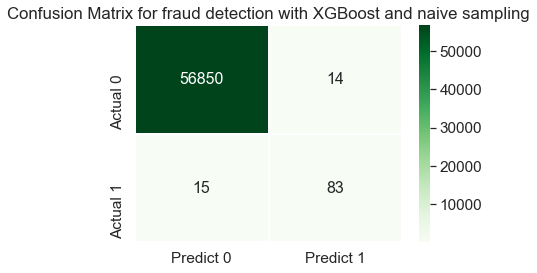

Accuracy: 0.9994908886626171
Sensitivity: 0.8469387755102041
Specificity: 0.9997537985368599
Precision: 0.8556701030927835
f1 score: 0.8512820512820514
AUC value is: 0.923346287023532
Model classification metrics have finished calculating!
Model fitting and results are complete!
Number of Xs and Ys for SMOTE:
[(0, 227451), (1, 227451)]
Oversampling is complete!
[0]	validation_0-error:0.031482	validation_1-error:0.026386
[5]	validation_0-error:0.024287	validation_1-error:0.013465
[10]	validation_0-error:0.021205	validation_1-error:0.012447
[15]	validation_0-error:0.018444	validation_1-error:0.010428
[20]	validation_0-error:0.016799	validation_1-error:0.009059
[25]	validation_0-error:0.015271	validation_1-error:0.00876
[30]	validation_0-error:0.013645	validation_1-error:0.008181
[35]	validation_0-error:0.011136	validation_1-error:0.007496
[40]	validation_0-error:0.010079	validation_1-error:0.006847
[45]	validation_0-error:0.00936	validation_1-error:0.006443
[50]	validation_0-error:0.0082

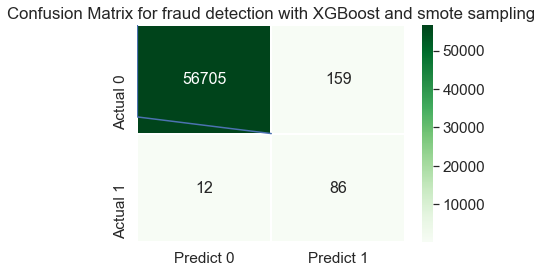

Accuracy: 0.9969979986657772
Sensitivity: 0.8775510204081632
Specificity: 0.99720385481148
Precision: 0.3510204081632653
f1 score: 0.5014577259475218
AUC value is: 0.9373774376098216
Model classification metrics have finished calculating!
Model fitting and results are complete!
Number of Xs and Ys for ADASYN:
[(0, 227451), (1, 227455)]
Oversampling is complete!
[0]	validation_0-error:0.071942	validation_1-error:0.095924
[5]	validation_0-error:0.048399	validation_1-error:0.051964
[10]	validation_0-error:0.035451	validation_1-error:0.042291
[15]	validation_0-error:0.028584	validation_1-error:0.035023
[20]	validation_0-error:0.023732	validation_1-error:0.028738
[25]	validation_0-error:0.019571	validation_1-error:0.025175
[30]	validation_0-error:0.016201	validation_1-error:0.022612
[35]	validation_0-error:0.013385	validation_1-error:0.020224
[40]	validation_0-error:0.011508	validation_1-error:0.01889
[45]	validation_0-error:0.010079	validation_1-error:0.017064
[50]	validation_0-error:0.008

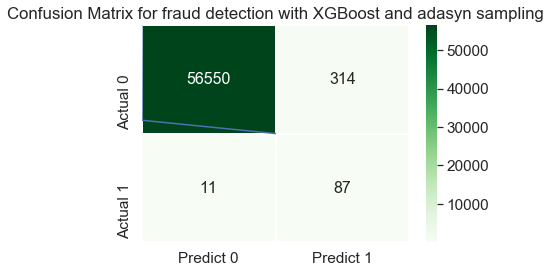

Accuracy: 0.9942944419086408
Sensitivity: 0.8877551020408163
Specificity: 0.994478052898143
Precision: 0.2169576059850374
f1 score: 0.3486973947895792
AUC value is: 0.9411165774694797
Model classification metrics have finished calculating!
Model fitting and results are complete!


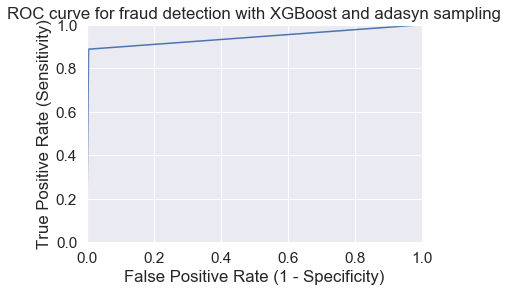

In [74]:
for samplingtypes in ['naive','smote','adasyn']:
    text = 'fraud detection with XGBoost and ' + str(samplingtypes) + ' sampling'
    results_xg = modelpipeline.run_model(df, 0.2, True, samplingtypes, 'XGBoost', text, False)

In [75]:
results_xg

{'model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=1, objective='binary:logistic', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
               silent=None, subsample=1, verbosity=1),
 'X_train': array([[ 0.99813402, -0.23059452, -0.20775717, ...,  0.11190439,
         -0.14282697, -0.31328796],
        [-0.20471542, -0.37966421,  1.02577654, ..., -0.91783696,
         -0.43865201, -0.16971694],
        [ 0.03701903,  0.49691842, -0.37022197, ...,  0.51134353,
          0.21293952, -0.3052918 ],
        ...,
        [ 0.96071009,  0.75565574, -1.4057755 , ..., -0.02153576,
          0.04447385, -0.32973272],
        [ 0.95962621,  0.73195307, -1.20441125, ...,  0.03409568,
          0.0823270

Oversampling is complete!
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=6, n_estimators=100 ...................................
[CV] ....... max_depth=6, n_estimators=100, score=1.000, total=30.0min
[CV] max_depth=6, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 30.0min remaining:    0.0s


[CV] ....... max_depth=6, n_estimators=100, score=1.000, total=13.2min
[CV] max_depth=6, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 43.2min remaining:    0.0s


[CV] ....... max_depth=6, n_estimators=100, score=1.000, total=11.6min
[CV] max_depth=6, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 54.8min remaining:    0.0s


[CV] ....... max_depth=6, n_estimators=100, score=1.000, total=10.9min
[CV] max_depth=6, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 65.7min remaining:    0.0s


[CV] ....... max_depth=6, n_estimators=100, score=1.000, total=10.8min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 76.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 76.5min finished


Best f1 score: 0.9996593862747869
Best parameters: {'max_depth': 6, 'n_estimators': 100}
[[56835    29]
 [   12    86]]


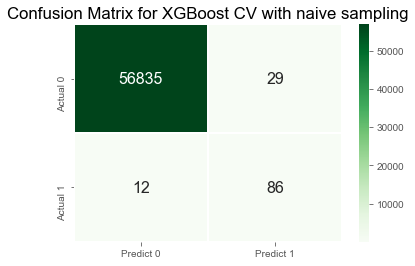

Accuracy: 0.9992802219023208
Sensitivity: 0.8775510204081632
Specificity: 0.999490011254924
Precision: 0.7478260869565218
f1 score: 0.8075117370892018
AUC value is: 0.9385205158315435
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 97.5609756097561%


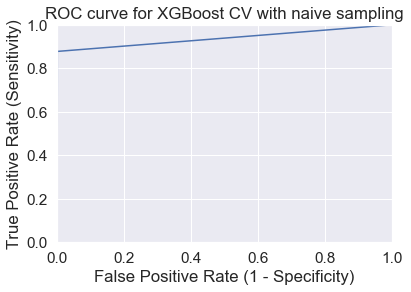

In [14]:
results = modelpipeline.run_model(df, 0.2, True, 'naive', 'XGBoost', "XGBoost CV with naive sampling", True)

In [15]:
results

{'model': GridSearchCV(cv=5, error_score='raise-deprecating',
              estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                   init=None, learning_rate=0.1,
                                                   loss='deviance', max_depth=3,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_iter_no_change=None,
                                    

In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Try to get square root of number of feature for max depth of XGBoost

In [31]:
from imblearn.over_sampling import ADASYN
X = df.drop(['Class'], axis=1)
y = df['Class']
X_adasyn, y_adasyn = ADASYN().fit_resample(X, y)
print("Number of Xs and Ys for ADASYN:")
print(sorted(Counter(y_adasyn).items()))
X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.1, random_state=42)

Number of Xs and Ys for ADASYN:
[(0, 284315), (1, 284298)]


In [34]:
X_train.shape[1]

30

In [37]:
import math
a = math.ceil(math.sqrt(X_train.shape[1]))
print(a)

6


In [ ]:
# Test standardization function

In [18]:
columns = df.columns.values.tolist()
columns.remove('Class')
print(columns)

test = df['V1']

test = (test - test.mean())/test.std()

test.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


count    2.848070e+05
mean    -2.316949e-17
std      1.000000e+00
min     -2.879850e+01
25%     -4.698909e-01
50%      9.245335e-03
75%      6.716927e-01
max      1.253349e+00
Name: V1, dtype: float64

In [19]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996580,-0.694241,-0.044075,1.672771,0.973364,-0.245116,0.347067,0.193679,0.082637,0.331127,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330891,-0.063781,0.244964,0
1,-1.996580,0.608495,0.161176,0.109797,0.316522,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307376,-0.880075,0.162201,-0.561130,0.320693,0.261069,-0.022256,0.044607,-0.342474,0
2,-1.996558,-0.693499,-0.811576,1.169466,0.268231,-0.364571,1.351451,0.639775,0.207372,-1.378673,...,0.337631,1.063356,1.456317,-1.138090,-0.628536,-0.288446,-0.137137,-0.181021,1.160684,0
3,-1.996558,-0.493324,-0.112169,1.182514,-0.609726,-0.007469,0.936148,0.192070,0.316017,-1.262501,...,-0.147443,0.007267,-0.304776,-1.941024,1.241902,-0.460217,0.155396,0.186188,0.140534,0
4,-1.996537,-0.591329,0.531540,1.021410,0.284655,-0.295015,0.071998,0.479301,-0.226510,0.744325,...,-0.012839,1.100009,-0.220123,0.233250,-0.395201,1.041609,0.543619,0.651815,-0.073403,0
5,-1.996537,-0.217474,0.581674,0.752584,-0.118833,0.305008,-0.022313,0.384935,0.217954,-0.517618,...,-0.283522,-0.771426,-0.042273,-0.613272,-0.446583,0.219637,0.628899,0.245636,-0.338556,0
6,-1.996495,0.627794,0.085389,0.029923,0.849382,0.139019,0.204694,-0.004170,0.067997,0.423217,...,-0.228333,-0.373032,-0.246779,-1.287970,1.439034,-0.533435,0.085492,0.015656,-0.333278,0
7,-1.996432,-0.328928,0.858691,0.708575,-0.347630,0.687510,0.321345,0.905858,-3.188224,0.560128,...,2.645884,-1.399273,0.092085,-1.072752,-0.796632,-0.107075,-2.990148,-3.288077,-0.190107,0
8,-1.996432,-0.456572,0.173291,-0.074652,-0.191774,1.934146,2.793589,0.299205,0.712590,-0.356851,...,-0.099963,-0.369424,-0.327055,1.670266,0.715942,-0.796632,0.029104,0.431419,0.019392,0
9,-1.996390,-0.172697,0.678004,0.688780,-0.156926,0.361791,-0.185218,0.526705,0.058223,-0.670586,...,-0.336155,-0.873297,-0.193438,-0.635766,-0.133773,0.195341,0.610009,0.251681,-0.338516,0


In [ ]:
# Test if finding actual accuracy with all fraud points work

In [20]:
allpositive = df[df['Class'] == 1].copy()
x_positive = allpositive.drop(['Class'], axis=1)
y_positive = allpositive['Class']
y_pospredict = store[model].predict(x_positive)
accuracy_positive = metrics.accuracy_score(y_positive, y_pospredict)
print("Accuracy with all fraud results is " + str(accuracy_positive * 100) + "%")
store['actual_accuracy'] = accuracy_positive

In [21]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

# applying SMOTE to our data and checking the class counts
X_resampled2, y_resampled2 = SMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled2).items()))

[(0, 284315), (1, 284315)]


In [ ]:
# importing ADASYN
from imblearn.over_sampling import ADASYN

# applying ADASYN
X_resampled3, y_resampled3 = ADASYN().fit_resample(x, y)
print(sorted(Counter(y_resampled3).items()))

In [ ]:
# BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

X_resampled4, y_resampled4 = BorderlineSMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled4).items()))

In [ ]:
# def model_train(X, Y):
#     # Define search parameter values
#     depth = [5,10,15,20]
#     tree_amt = [50,100,150]
#     RFC = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=50)

#     # Create a parameter grid: map the parameter names to search values
#     param_grid = dict(max_depth=depth, n_estimators=tree_amt)
#     print(param_grid)

#     # Instantiate and fit the grid
#     grid = GridSearchCV(RFC, param_grid, cv=10, scoring='accuracy')
#     grid.fit(X,Y)
    
#     return grid

In [ ]:
# naive_sampling_model = model_train(X_resampled, y_resampled)

In [ ]:
#     def model_normalnaive(self, df, testratio, text, modelname):
#         df = df.drop('Time', axis=1)
#         return self.initialize_model(df, testratio, text, "naive", modelname)

#     def model_w_standardize(self, df, testratio, text, modelname):
#         df = df.drop('Time', axis=1)
#         df = self.standardize(df)
#         return self.initialize_model(df, testratio, text, "naive", modelname)

#     def model_smote(self, df, testratio, text, modelname):
#         df = df.drop('Time', axis=1)
#         df = self.standardize(df)
#         return self.initialize_model(df, testratio, text, "smote", modelname)
    
#     def model_adasyn(self, df, testratio, text, modelname):
#         df = df.drop('Time', axis=1)
#         df = self.standardize(df)
#         return self.initialize_model(df, testratio, text, "adasyn", modelname)